# smart-vqa

Implementation of the Smart101 technique with the PathVQA dataset

In [6]:
#install dependencies
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install datasets transformers tqdm opencv-python numpy matplotlib Pillow pandas nltk

#Clip
!pip install git+https://github.com/openai/CLIP.git

#For Jupyter
!pip install ipywidgets

Looking in indexes: https://download.pytorch.org/whl/cu118
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-p2el080r
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-p2el080r
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached widgetsnbextension-4.0.9-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata (4.1 kB)
Using cached ipywidgets-8.1.1-py3-none-any.whl (139 kB)
Using cached jupyterlab_widgets-3.0.9-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.9-py3-none-any.whl (2.3 MB)


In [40]:
#imports
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
from tqdm import tqdm
from datasets import load_dataset, load_dataset_builder
from PIL import Image
from IPython.display import HTML, display
import base64
from io import BytesIO


In [37]:
# Function to get the base64 string of an image
def get_image_base64(image):
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode()

In [19]:
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4></td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

# Path-VQA Dataset composition
|          | Training Set | Validation Set | Test Set |
|----------|--------------|----------------|----------|
| QAs      | 19,654	      | 6,259          | 6,719    |
| Images   | 2,599	      | 832            | 858      |

In [10]:
ds_builder = load_dataset_builder("flaviagiammarino/path-vqa")
print("Description: ", ds_builder.info.description)
print("Features: ", ds_builder.info.features)

Description:  
Features:  {'image': Image(decode=True, id=None), 'question': Value(dtype='string', id=None), 'answer': Value(dtype='string', id=None)}


Getting the first row........


,image,question,answer
0,,where are liver stem cells (oval cells) located?,in the canals of hering
0,,what are stained here with an immunohistochemical stain for cytokeratin 7?,bile duct cells and canals of hering
0,,what do the areas of white chalky deposits represent?,foci of fat necrosis
0,,is embolus derived from a lower-extremity deep venous thrombus lodged in a pulmonary artery branch?,yes
0,,how is hyperplasia without atypia characterized?,by nests of closely packed glands
0,,is normal palmar creases present?,no
0,,where is this from?,gastrointestinal system
0,,what is present?,gastrointestinal
0,,what is present?,esophagus
0,,what is present?,varices

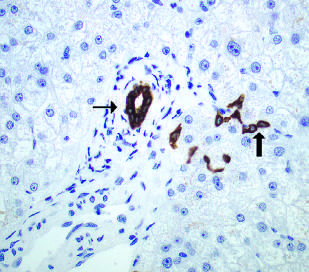
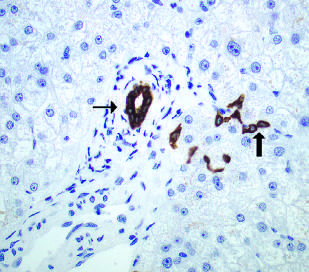
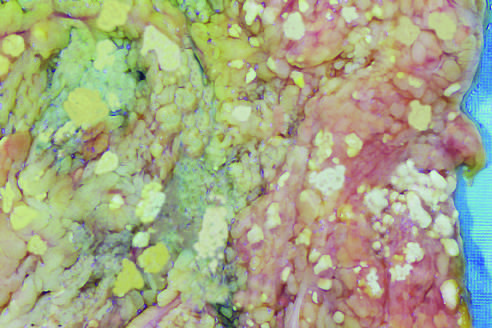
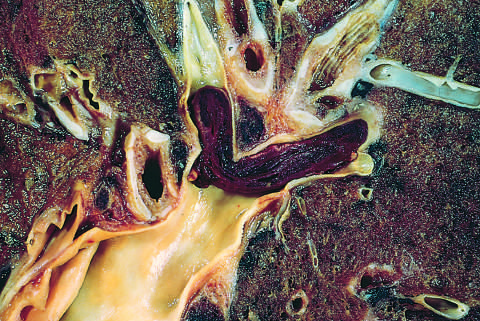
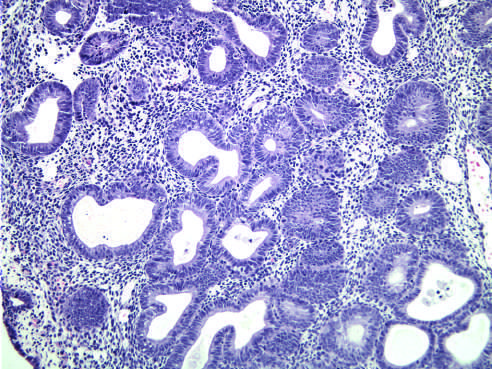
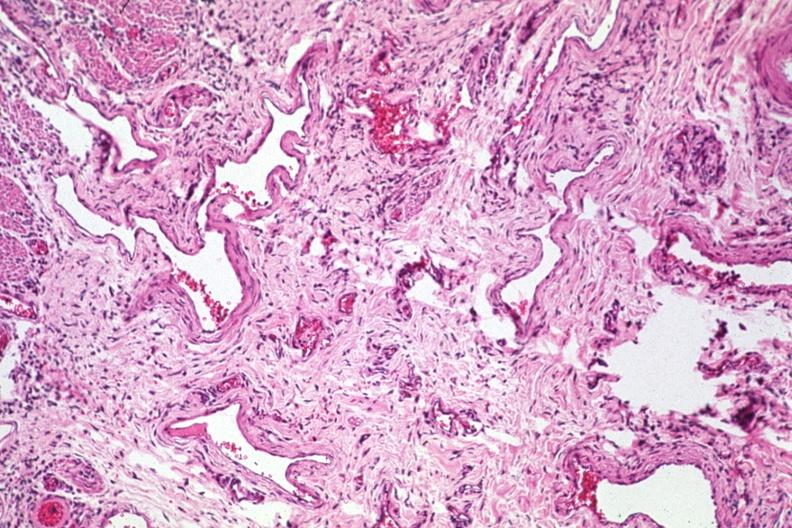
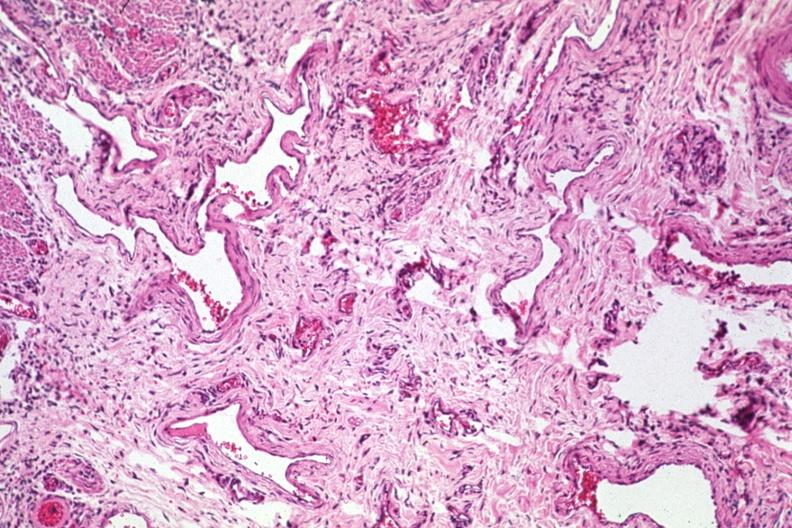
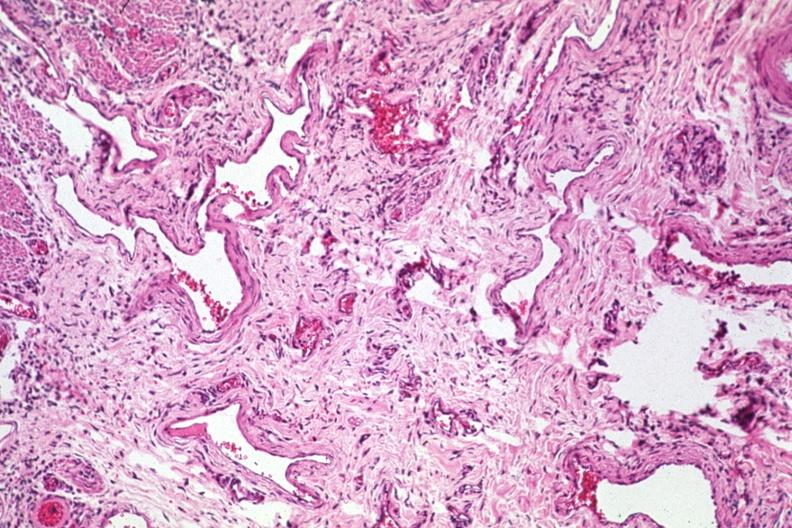
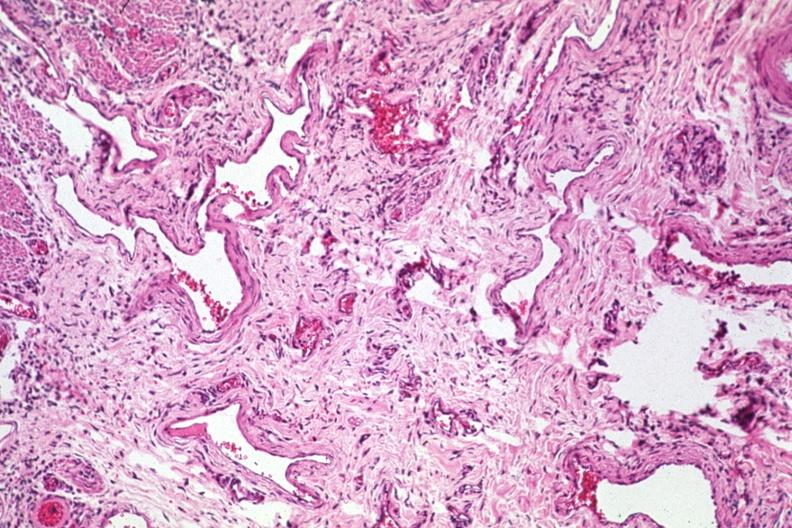
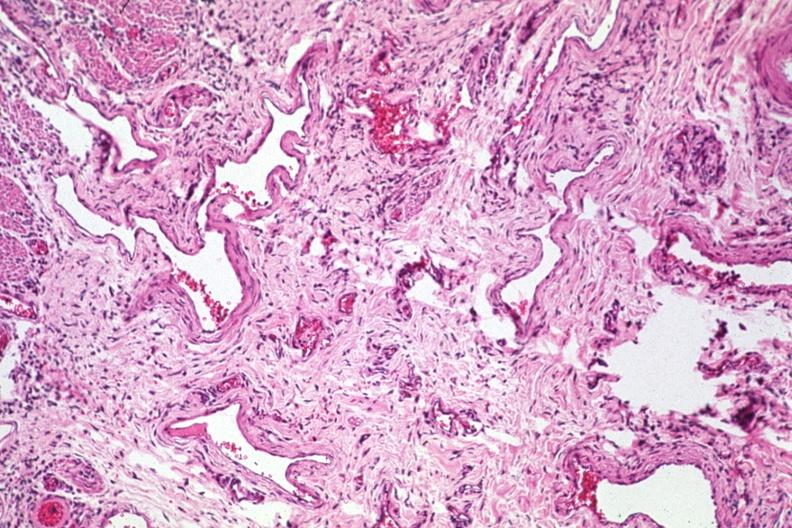

In [72]:
dataset = load_dataset("flaviagiammarino/path-vqa", split="train")

print("Getting the first 10 rows........")
df = pd.DataFrame()
for i, row in enumerate(dataset):
    if i < 10:
        # Convert image to base64 string
        img_b64 = get_image_base64(row['image'])
        
        # Add image data to the dictionary
        row['image'] = f'<img src="data:image/jpeg;base64,{img_b64}" width="100"/>'
        
        # Create a DataFrame for the current row and append it
        df2 = pd.DataFrame([row])
        df = pd.concat([df, df2], axis=0)  # Concatenate row-wise
    else:
        break

# Convert the complete DataFrame to HTML
html = df.to_html(escape=False)

# Display the HTML table
display(HTML(html))